In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('shop data.csv')

In [7]:
df

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>35,medium,male,single,yes
4,>35,low,female,single,yes
5,>35,low,female,single,no
6,25-35,low,female,married,yes
7,<25,medium,male,married,no
8,<25,low,female,single,yes
9,>35,medium,female,married,yes


In [9]:
x = df.iloc[:,:-1]

In [11]:
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


In [15]:
y = df.iloc[:,4]

In [17]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
14     no
15    yes
16    yes
17    yes
18    yes
19    yes
20     no
21    yes
Name: buys, dtype: object

In [19]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le_x=LabelEncoder()
x = x.apply(LabelEncoder().fit_transform)

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.25,random_state=1)

In [23]:
xtrain

,age,income,gender,m_status
10,1,2,0,1
4,2,1,0,1
2,0,0,1,1
17,1,0,0,1
6,0,1,0,0
7,1,2,1,0
1,1,0,1,0
14,1,0,1,1
0,1,0,1,1
21,1,1,1,1


In [25]:
xtest

,age,income,gender,m_status
19,0,0,1,1
16,2,2,1,0
3,2,2,1,1
13,2,2,1,0
18,0,2,0,0
15,1,0,0,0


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dect = DecisionTreeClassifier()

In [31]:
dect.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [33]:
y_predict = dect.predict(xtest)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest,y_predict)

In [37]:
cm

array([[1, 0],
       [2, 3]], dtype=int64)

In [39]:
xinput = np.array([1,0,0,1])

In [41]:
y_predict = dect.predict([xinput])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [43]:
y_predict

array(['yes'], dtype=object)

Text(95.72222222222221, 0.5, 'Truth')

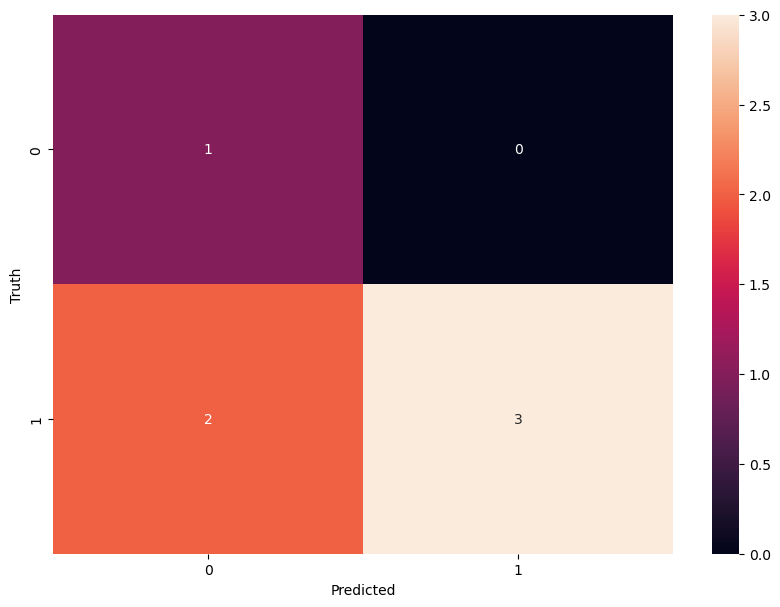

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
dect.score(xtest,ytest)

0.6666666666666666